In [40]:
import pandas as pd 
import matplotlib.pyplot as plt
df = pd.read_csv("./temporal_graph_data/Error_WholeData_abs.csv",delimiter = ',') 

df[df< 0] = 0
#df1= dataframe_collection[0][305:801]
df1= df[397:753]
#df1= dataframe_collection[0][675:854]


,Unnamed: 0,Modelflow,Obsflow,Error,NWM_min,NWM_max,ML_1min,ML_1max
397,397,514.514363,501.208192,186.723487,393.519991,1026.019977,327.790876,701.237851
398,398,445.113740,421.921020,185.995056,386.429991,630.859986,259.118684,631.108796
399,399,419.929366,413.425966,193.619286,366.279992,478.929989,226.310080,613.548651
400,400,393.541241,353.960587,203.613800,374.289992,434.209990,189.927441,597.155041
401,401,396.852491,175.847620,202.449461,347.139992,669.079985,194.403030,599.301952
...,...,...,...,...,...,...,...,...
748,748,265.469369,906.139104,195.256258,238.079995,296.759993,70.213111,460.725627
749,749,291.278744,883.485626,209.247583,258.729994,323.379993,82.031161,500.526326
750,750,290.088744,860.832149,208.735480,248.269994,376.019992,81.353263,498.824224
751,751,316.181243,931.624266,212.622289,262.949994,397.799991,103.558954,528.803532


# 13(a) Plot


In [41]:
import numpy as np
res_ML=df1["Obsflow"].between(df1["ML_1min"],df1["ML_1max"])
count_ML = np.count_nonzero(res_ML)
prob_ML=count_ML/len(df1)
prob_ML = round(prob_ML, 2)


res_NWM=df1["Obsflow"].between(df1["NWM_min"],df1["NWM_max"])
count_NWM= np.count_nonzero(res_NWM)
prob_NWM=count_NWM/len(df1)
prob_NWM = round(prob_NWM, 2)

date_to_omit=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 12, 21, 28, 35, 45, 46, 68, 92, 93, 94, 95, 100, 101, 102, 104, 115, 116, 117, 118, 131, 133, 134, 135, 146, 147, 167, 168, 169, 170, 173, 178, 179, 191, 195, 199, 200, 201, 219, 225, 232, 251, 254, 256, 257, 258, 259, 260, 261, 262, 275, 276, 277, 314, 317, 318, 319, 320, 321, 322, 323, 324, 348, 368, 419, 420,421, 446,452, 453, 454, 456, 457, 480, 508, 624, 625, 626, 700,712, 791, 841, 871, 872, 873, 874, 875, 876, 877, 878, 879, 880, 881, 882, 883, 884,885, 886, 887, 888, 889, 890, 891, 892, 893, 894, 895, 896, 897, 898,899, 900, 901, 902, 903, 904, 905, 906, 907, 908, 909, 910, 911, 933,934]
a=pd.date_range(start="2018-12-11",end="2021-08-15").to_list()
print(len(a))

for index in sorted(date_to_omit, reverse=True):
    del a[index]

#b=pd.to_datetime(a[305:801])
b=pd.to_datetime(a[397:753])
#b=pd.to_datetime(a[675:854])
b
df1.index=b

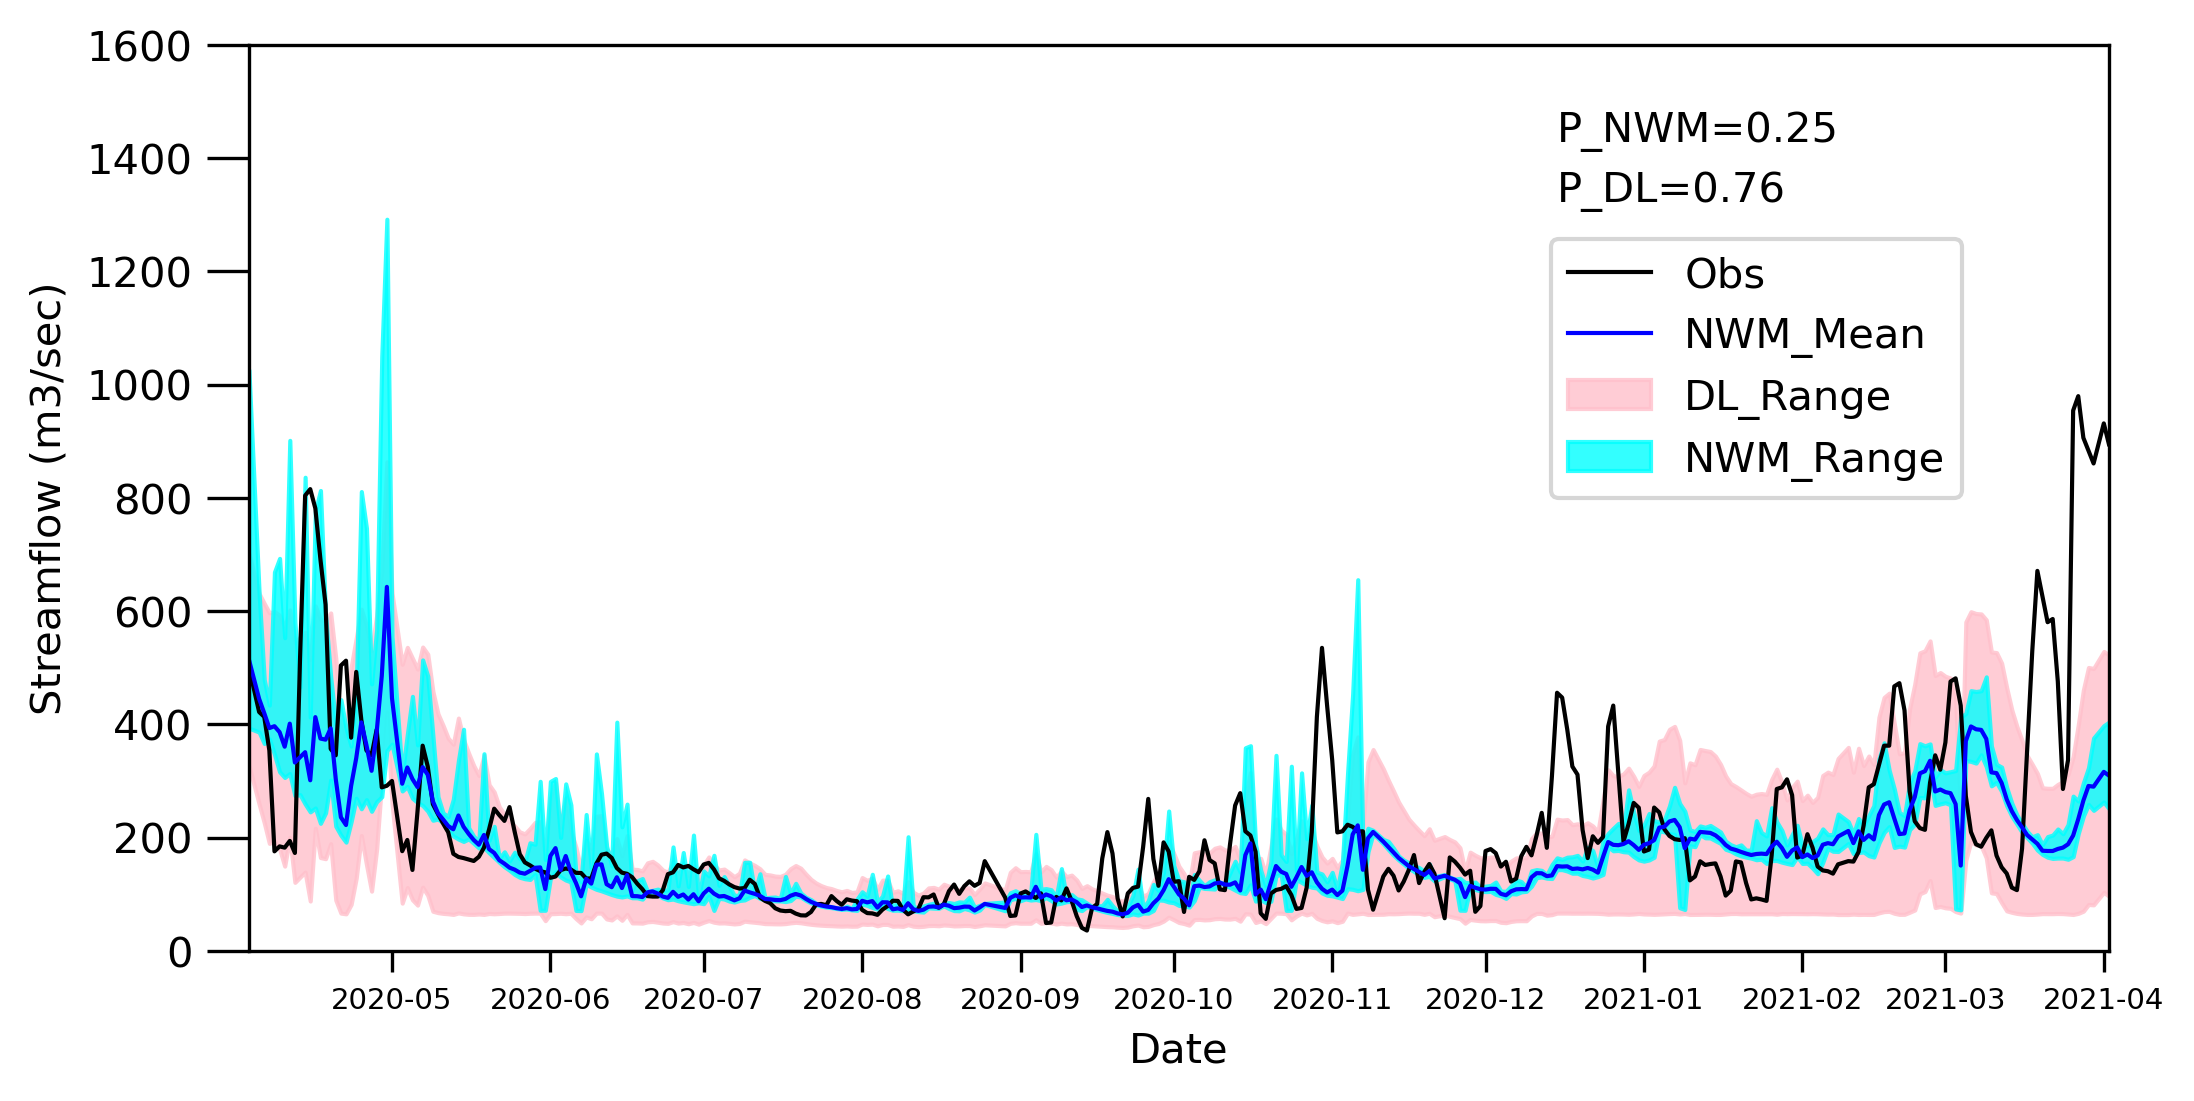

In [60]:
fig = plt.figure(figsize=(3.54,3.54), dpi=300)

plt.plot(df1['Obsflow'], 'k', linewidth=1, label='Obs',alpha=1.0)
plt.plot(df1['Modelflow'], 'b', linewidth=1, label='NWM_Mean',alpha=1.0) 
plt.fill_between(b, df1['ML_1min'],df1['ML_1max'],label='DL_Range',  color='pink', alpha=0.8)
plt.fill_between(b, df1['NWM_min'],df1['NWM_max'],label='NWM_Range',  color='cyan', alpha=0.8)

plt.legend(loc=(0.7, 0.5), fontsize=10)


plt.figtext(.67, .75, "P_DL=%.2f"%(prob_ML))
plt.figtext(.67, .8, "P_NWM=%.2f"%(prob_NWM))

fig.set_size_inches(10, 6)

plt.xlabel("TimeStamps")
plt.ylabel("Streamflow")

#plt.axhline(y=0, color='k',linewidth=2)
#plt.axvline(x=0, color='k',linewidth=2)
fig.set_size_inches(8, 4)
plt.xlabel("Date")
plt.ylabel("Streamflow (m3/sec)")


plt.tick_params(axis='x',direction='out', length=5)
plt.tick_params(axis='y',direction='out', length=10)
plt.ylim(0, 1600)
plt.xlim(df1.index[0], df1.index[355])
plt.xticks(fontsize=7)
fig.set_facecolor('white')
#ax = plt.axes()


plt.show()


fig.savefig('fig13(a).png',bbox_inches='tight')

# 13(b) Plot



In [2]:
import pandas as pd 

df1 = pd.read_csv('prediction_std_stderr_probability_ungagued.csv',delimiter = ',')
df2 = pd.read_csv('prediction_std_stderr_probability_NWM_0-30.csv',delimiter = ',')

df1["plus"]=df1["Pred"] +  df1["Std_err"]
df1["minus"]=df1["Pred"] -  df1["Std_err"]
#df1["plus"]=df1["Pred"] +  df1["Std"]
#df1["minus"]=df1["Pred"] -  df1["Std"]
df1[df1< 0] = 0
df1[df1>1 ] = 1


df2["plus"]=df2["Pred"] +  df2["Std_err"]
df2["minus"]=df2["Pred"] -  df2["Std_err"]
#df2["plus"]=df2["Pred"] +  df2["Std"]
#df2["minus"]=df2["Pred"] -  df2["Std"]

df2[df2< 0] = 0
df2[df2>1 ] = 1

df2

df1=df1.drop(columns=[df1.columns[0],df1.columns[2],df1.columns[3]])

df2=df2.drop(columns=[df2.columns[0],df2.columns[2],df2.columns[3]])


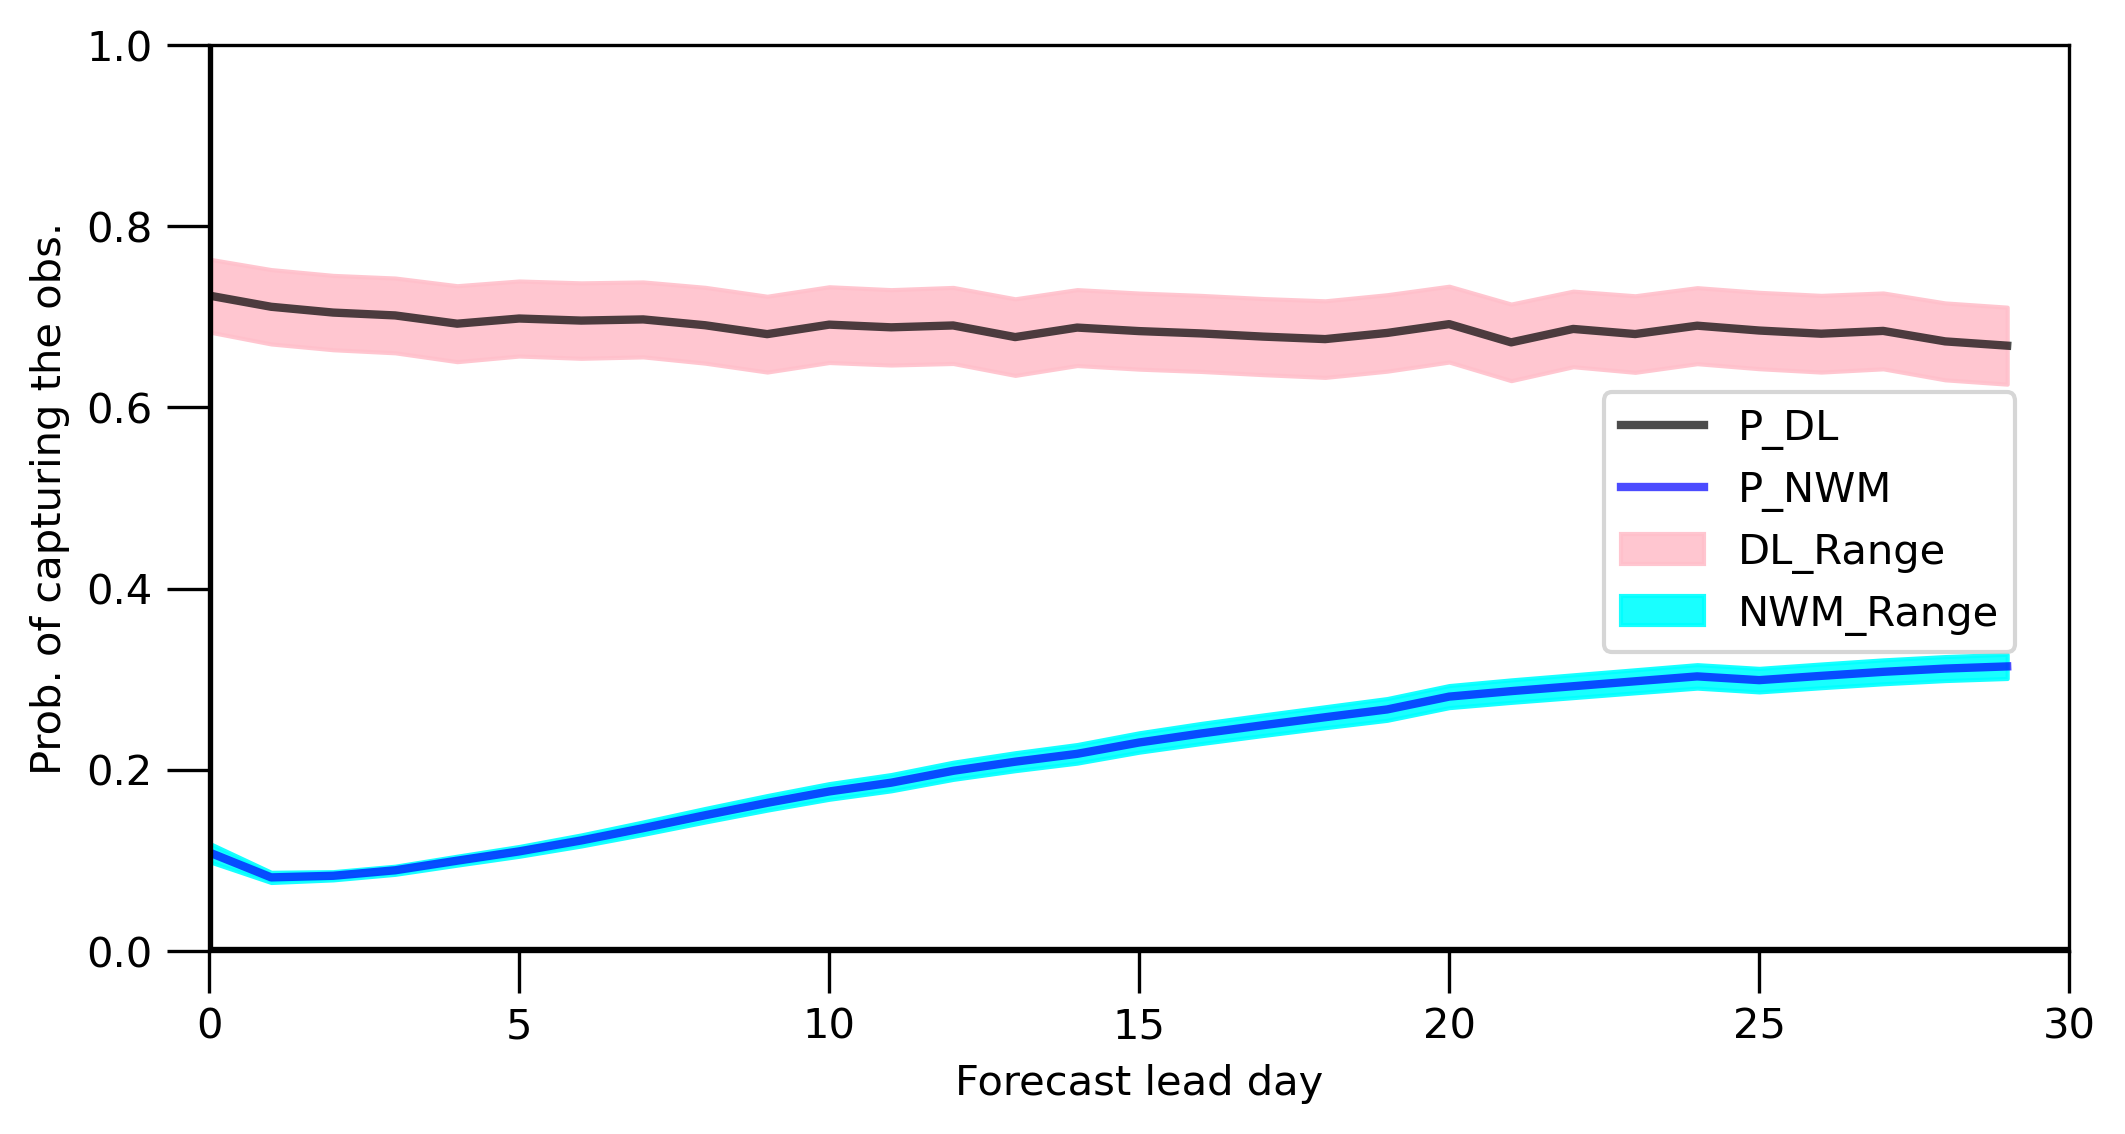

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(3.54,3.54), dpi=300)
plt.plot(df1['Pred'], 'k', linewidth=2, label='P_DL',alpha=0.7)
plt.plot(df2['Pred'], 'b', linewidth=2, label='P_NWM',alpha=0.7) 
plt.fill_between(df1.index, df1['plus'],df1['minus'],label='DL_Range',  color='pink', alpha=0.9)
plt.fill_between(df1.index, df2['plus'],df2['minus'],label='NWM_Range',  color='cyan', alpha=0.9)
plt.legend(loc=(0.9, 0.9), fontsize=10)
plt.xlabel("Lead day",fontsize=10)
plt.ylabel("Probability of Capturing Obsflow",fontsize=10)
plt.axhline(y=0, color='k',linewidth=2)
plt.axvline(x=0, color='k',linewidth=2)

plt.legend(loc=(0.75, 0.33), fontsize=10)
plt.xlabel("Forecast lead day",fontsize=10)
plt.ylabel("Prob. of capturing the obs.",fontsize=10)
fig.set_facecolor('white')
fig.set_size_inches(8, 4)
#fig.set_backgroundcolor('white')
plt.grid(False)
plt.tick_params(axis='x',direction='out', length=10)
plt.tick_params(axis='y',direction='out', length=10)
plt.ylim(0, 1.0)
plt.xlim(0, 30)
#plt.axhline(y=0, color='black',linewidth=1)
#plt.axvline(x=df1.index[0], color='black',linewidth=1)

plt.show()
fig.savefig('fig13(b).png', bbox_inches='tight')

# 14(a) Plot



In [7]:
import pandas as pd 

df1 = pd.read_csv('prediction_std_stderr_probability_lnd1.csv',delimiter = ',')
df2 = pd.read_csv('prediction_std_stderr_probability_lnd2.csv',delimiter = ',')
df3 = pd.read_csv('prediction_std_stderr_probability_lnd3.csv',delimiter = ',')

df1['prob_plus'] = df1['Pred']+df1['Std_err']
df1['prob_minus'] = df1['Pred']-df1['Std_err']

df2['prob_plus'] = df2['Pred']+df1['Std_err']
df2['prob_minus'] = df2['Pred']-df1['Std_err']

df3['prob_plus'] = df3['Pred']+df3['Std_err']
df3['prob_minus'] = df3['Pred']-df3['Std_err']

df1=df1.drop(columns=[df1.columns[0],df1.columns[2],df1.columns[3]])
df2=df2.drop(columns=[df2.columns[0],df2.columns[2],df2.columns[3]])
df3=df3.drop(columns=[df3.columns[0],df3.columns[2],df3.columns[3]])

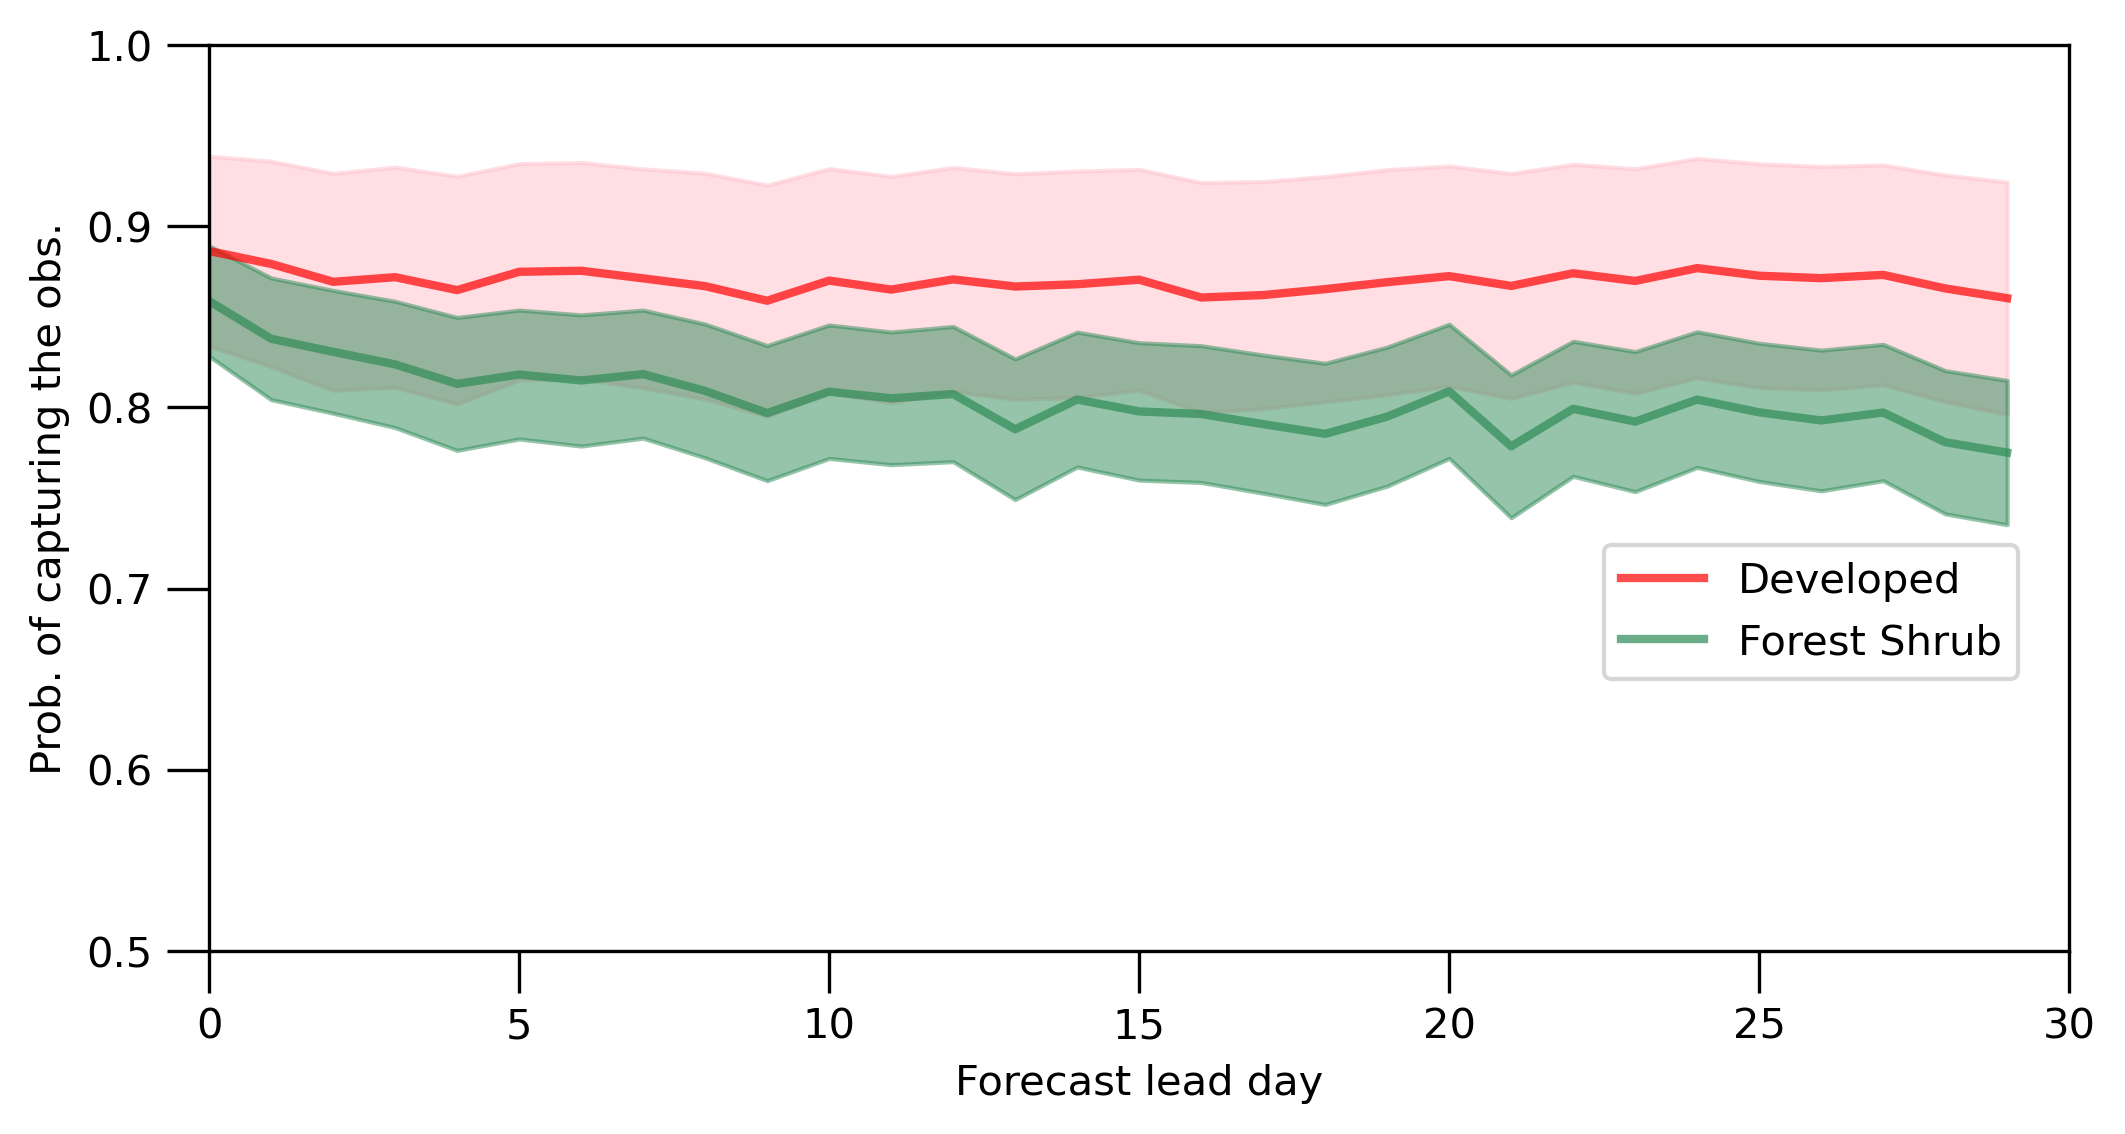

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt



fig = plt.figure(figsize=(3.54,3.54), dpi=300)
plt.plot(df1['Pred'], 'r', linewidth=2, label='Developed',alpha=0.7)
plt.plot(df3['Pred'], 'seagreen', linewidth=2, label='Forest Shrub',alpha=0.7)

plt.fill_between(df1.index, df1['prob_plus'],df1['prob_minus'],  color='pink', alpha=0.5)
plt.fill_between(df3.index, df3['prob_plus'],df3['prob_minus'],  color='seagreen', alpha=0.5)
#plt.legend(loc=(0.9, 0.9), fontsize=10)
#plt.xlabel("Lead day",fontsize=10)
#plt.ylabel("Probability of Capturing Obsflow",fontsize=10)

#plt.show()
#fig.savefig('fig3_rev_01_08.png', bbox_inches='tight')
plt.legend(loc=(0.75, 0.3), fontsize=10)
plt.xlabel("Forecast lead day",fontsize=10)
plt.ylabel("Prob. of capturing the obs.",fontsize=10)
fig.set_facecolor('white')
fig.set_size_inches(8, 4)
plt.xlim(0.0, 30.0)
plt.ylim(0.5, 1.0)
plt.grid(False)
plt.tick_params(axis='x',direction='out', length=10)
plt.tick_params(axis='y',direction='out', length=10)
#plt.axhline(y=0.5, color='black',linewidth=1)
#plt.axvline(x=0, color='black',linewidth=1)

plt.show()
fig.savefig('fig14(a).png', bbox_inches='tight')

# 14(b) Plot

In [11]:
import pandas as pd 

df1 = pd.read_csv('prediction_std_stderr_probability_less_2.5.csv',delimiter = ',')
df2 = pd.read_csv('prediction_std_stderr_probability_grt.csv',delimiter = ',')


df1['prob_plus'] = df1['Pred']+df1['Std_err']
df1['prob_minus'] = df1['Pred']-df1['Std_err']

df2['prob_plus'] = df2['Pred']+df1['Std_err']
df2['prob_minus'] = df2['Pred']-df1['Std_err']

df1=df1.drop(columns=[df1.columns[0],df1.columns[2],df1.columns[3]])
df2=df2.drop(columns=[df2.columns[0],df2.columns[2],df2.columns[3]])


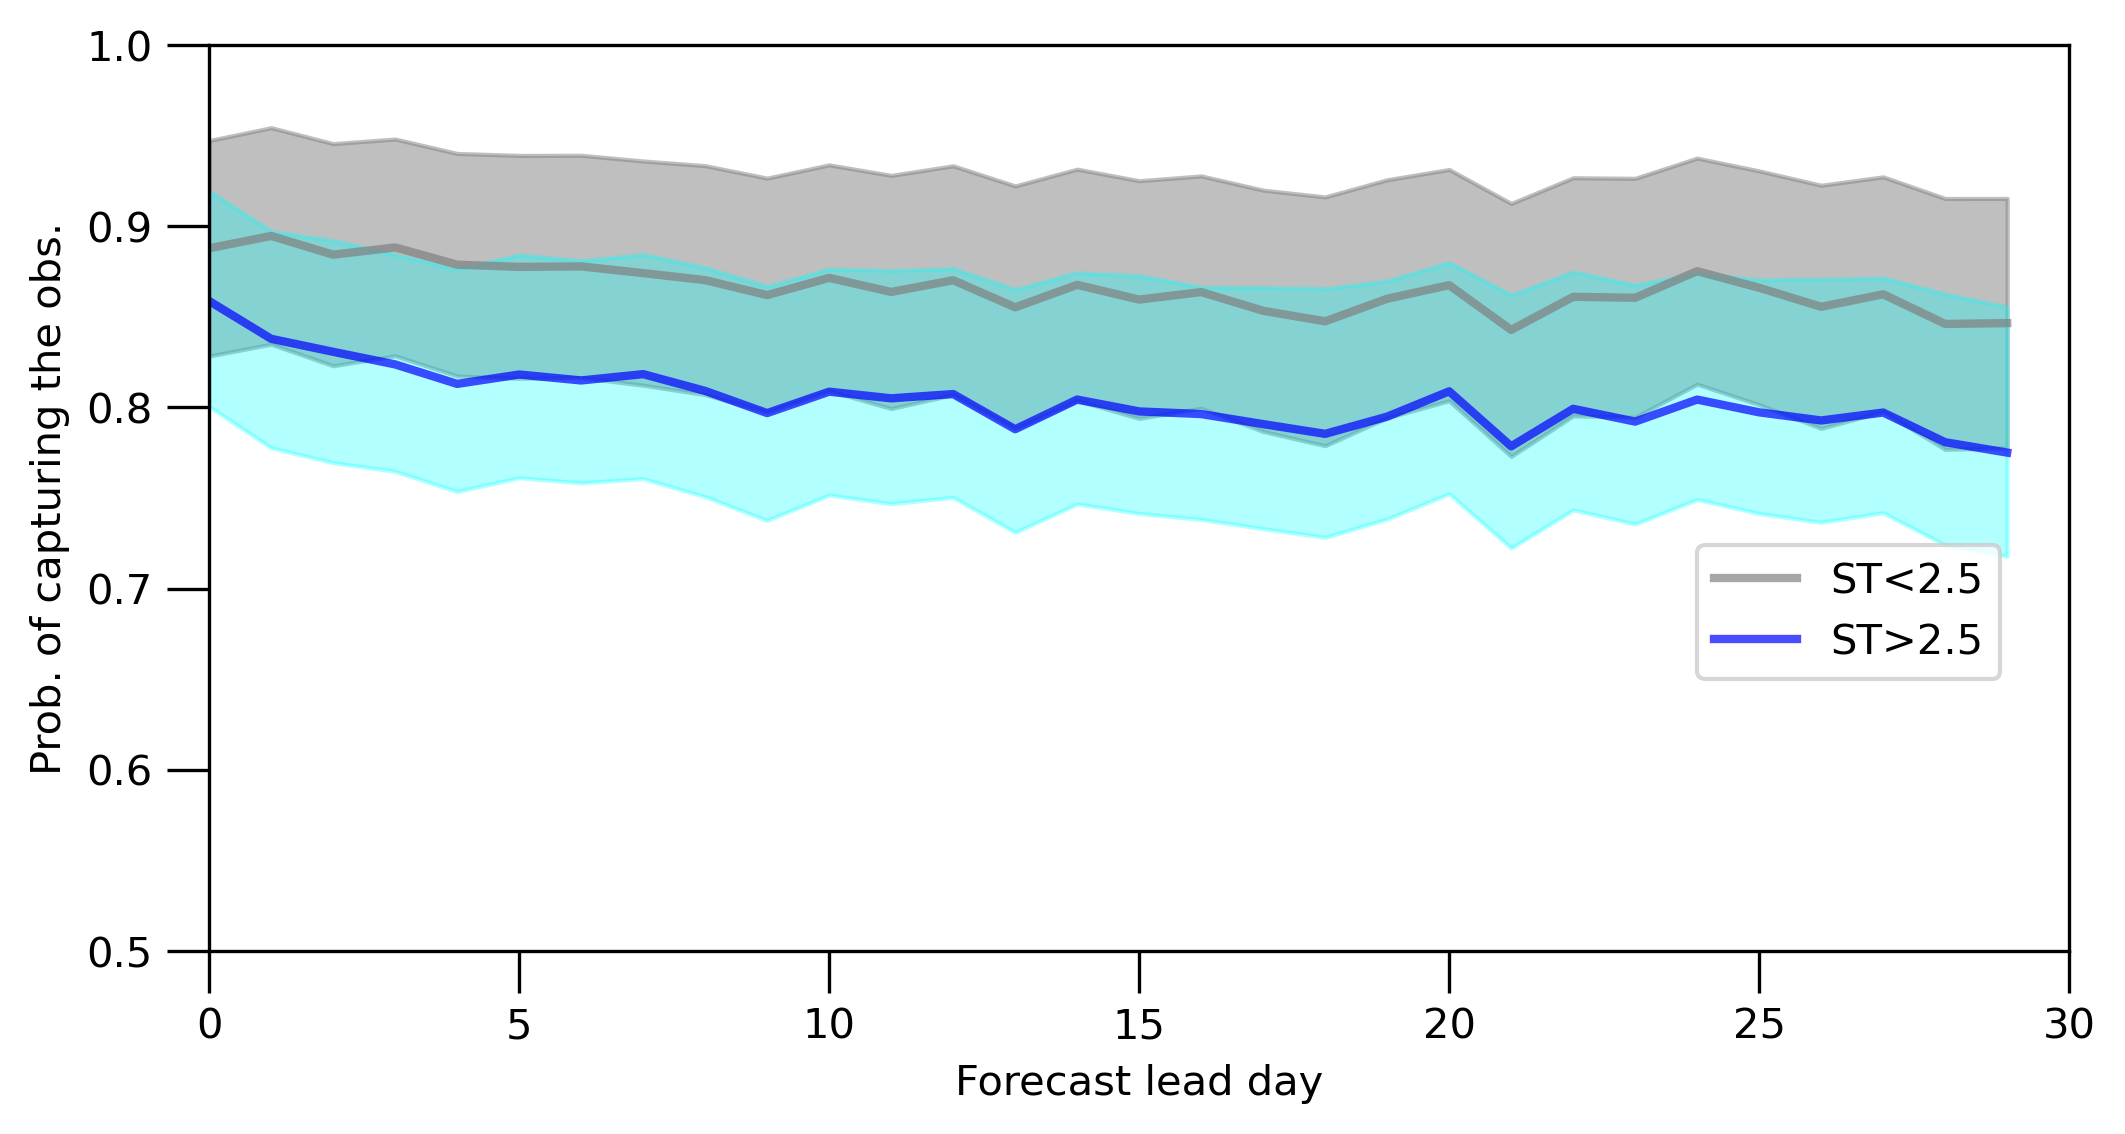

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
#plt.style.use('fivethirtyeight')


fig = plt.figure(figsize=(3.54,3.54),dpi=300)
plt.plot(df1['Pred'], 'gray', linewidth=2, label='ST<2.5',alpha=0.7)
plt.plot(df3['Pred'], 'b', linewidth=2, label='ST>2.5',alpha=0.7)

plt.fill_between(df1.index, df1['prob_plus'],df1['prob_minus'],  color='gray', alpha=0.5)
plt.fill_between(df2.index, df2['prob_plus'],df2['prob_minus'],  color='cyan', alpha=0.3)

plt.legend(loc=(0.8, 0.3), fontsize=10)
plt.xlabel("Forecast lead day",fontsize=10)
plt.ylabel("Prob. of capturing the obs.",fontsize=10)
plt.ylim(0.5, 1.0)
plt.xlim(0.0, 30.0)
fig.set_facecolor('white')
fig.set_size_inches(8, 4)

plt.grid(False)
plt.tick_params(axis='x',direction='out', length=10)
plt.tick_params(axis='y',direction='out', length=10)
#plt.axhline(y=0.5, color='black',linewidth=1)
#plt.axvline(x=0, color='black',linewidth=1)

plt.show()
fig.savefig('fig14(b).png', bbox_inches='tight')
